<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Elvis_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERVISED LEARNING**

1.1 *Defining the Question*

Football is the most popular sport in the world having over 1.5 billion viewers worldwide. The most popular tournament is the FIFA World Cup which takes place after four years on a rotational basis across all continents. The international teams are ranked using the results of FIFA recognized international matches. Brazil is currently the longest holder of the first position. The rankings also help betting firms and football analyst firms such as Mchezopesa Ltd. However, it can be a nightmare for the firms to solely rely on the FIFA rankings forcing them to adapt statistical approaches to try and predict a football’s match outcome based on a team’s recent results. 

1.2 # Defining the Metrics of Success

Successfully performing Exploratory Data Analysis, Univariate, Bivariate Analysis,Create Visualizations, employing two approaches: Polynomial and Logistical approaches and Challenging the solution.

1.3 Understanding the context

It is estimated that in the 2019/2020 season, the football industry generated over 25.2 $billion. Betting firms are estimated to have interacted with over 1 billion euros in the United Kingdom. This draws attention to the use of statistical data to predict the outcome of the matches with the main objective of avoiding losses. 

1.4 Recording the Experimental Design
The data will be ran through an EDA analysis after having been subjected to cleaning, Polynomial analyis an Logistical analyis 

Data Relevance 
The data was collected from trusted Fifa sources and validated by https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc above link.

# Importing the libraries needed

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

Loading the Datasets

In [2]:
#Loading the fifa_ranking datasets
fifa_ranking = pd.read_csv('fifa_ranking.csv')
fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [24]:
fifa_ranking.shape

(57793, 16)

The fifa ranking dataset has 57793 rows and 16 columns

In [5]:
#importing the results dataset
results = pd.read_csv('results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [26]:
results.shape

(40839, 9)

The results dataset has 40839 rows and 9 columns

In [27]:
#Getting more information on the datasets
fifa_ranking.info

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

In [28]:
#results info
results.info

<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [13]:
# identify the column names in our dataset
fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

The above are variables to the fifa_ranking dataset

In [14]:
#identify the column in our results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The above are variables of the results dataset

In [6]:
#identifying missing values in the datasets
# Identify any missing values in the fifa dataset
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

Their no missing values in the Fifa ranking dataset

In [32]:
#identifying missing values in the results dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Their are no missing values in the dataset

In [33]:
#Checking if the datasets have the right datatype
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [34]:
#Results
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [35]:
#checking for unique values in the datasets
fifa_ranking.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [36]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [37]:
# Check for duplicate values in the fifa ranking dataset
fifa_ranking.duplicated().sum()

37

In [38]:
#checking for duplicate in the results dataset
results.duplicated().sum()

0

In [4]:
#details of the datasets
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [40]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


3.1 **Tidying the datasets**

In [5]:
#removing the duplicates from the fifa dataset
fifa_ranking.drop_duplicates(subset=None, keep='first', inplace= False)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


The number of rows has significantly reduced

In [6]:
#checking for any anomalies of the results dataset
col = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral']
for i in col:

  u = results[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  date is ['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']
Unique values of  home_team is ['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Sa

In [3]:
# Drop columns that we will not use in our analysis
fifa_ranking.drop(['country_abrv','cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted','rank_date'],axis=1, inplace=True)
# Confirm changes
fifa_ranking.head(2)


,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,confederation
0,1,Germany,0.0,57,0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,UEFA


In [6]:
# Drop columns that we will not use in our analysis
results.drop(['neutral'],axis=1, inplace=True)
# Confirm changes
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England


We have dropped the columns from the fifa and resuslts datasets to enbale us to merge them into one.

In [7]:
#Renaming some column names in the fifa dataset
fifa_ranking  = fifa_ranking.rename(columns={"country_full":"country"})
print(fifa_ranking.head(2))

   rank  country  total_points  ...  rank_change  cur_year_avg  confederation
0     1  Germany           0.0  ...            0           0.0           UEFA
1     2    Italy           0.0  ...            0           0.0           UEFA

[2 rows x 7 columns]


In [8]:
#Merging the datasets using the country column
prediction_df = pd.merge(fifa_ranking, results, how = 'left', left_on = ['country'], right_on = ['country'] )
prediction_df.head(4)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city
0,1,Germany,0.0,57,0,0.0,UEFA,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe
1,1,Germany,0.0,57,0,0.0,UEFA,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg
2,1,Germany,0.0,57,0,0.0,UEFA,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve
3,1,Germany,0.0,57,0,0.0,UEFA,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart


In [9]:
#identify the column in our results dataset
prediction_df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'confederation', 'date', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'city'],
      dtype='object')

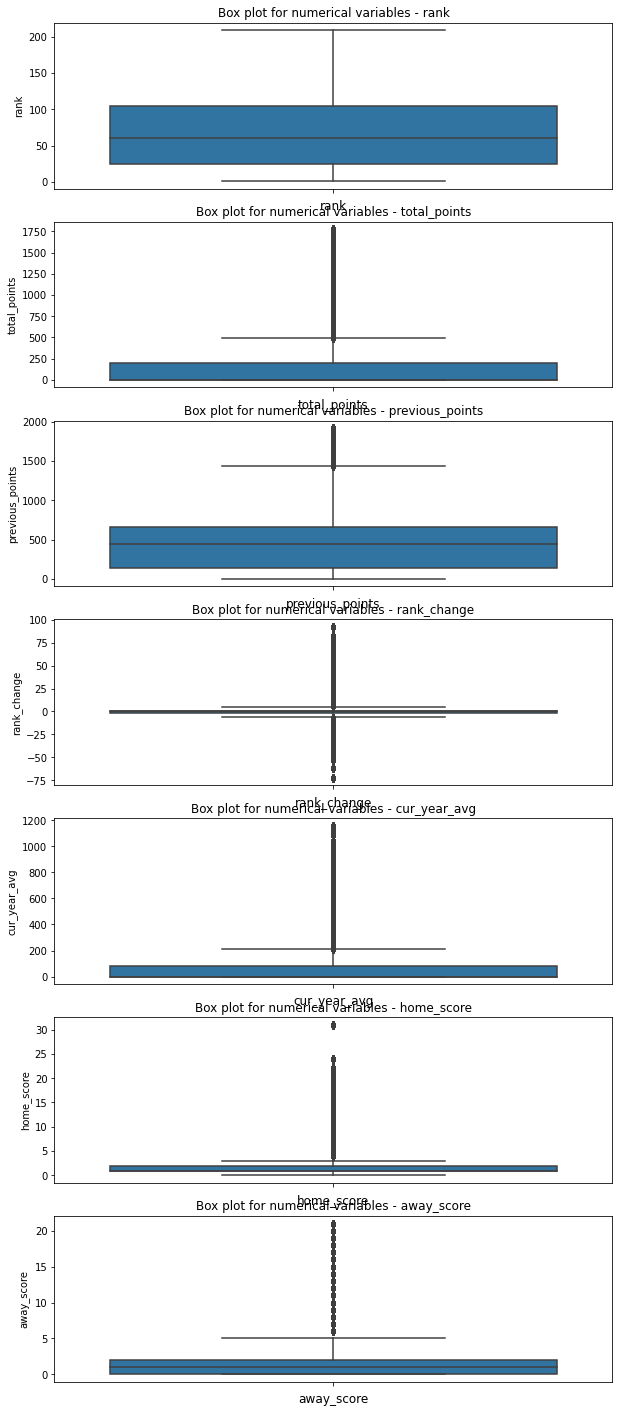

In [49]:
#checking for outliers
col_names= ['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg','home_score', 'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=prediction_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

i choose to retain the outliers to help preserve data validity during statistical analysis.

In [9]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting confideration, home team, away team, tournament, city and country
print(prediction_df["confederation"].unique())
print(prediction_df['home_team'].unique())
print(prediction_df['away_team'].unique())
print(prediction_df['tournament'].unique())
print(prediction_df['city'].unique())
print(prediction_df['country'].unique())

['UEFA' 'CONMEBOL' 'CONCACAF' 'CAF' 'AFC' 'OFC']
['Germany' 'German DR' 'Switzerland' 'Austria' 'Yugoslavia' 'Brazil'
 'DR Congo' 'Italy' 'Poland' 'Sweden' 'Uruguay' 'Chile' 'Scotland'
 'Argentina' 'Bulgaria' 'Haiti' 'Netherlands' 'Australia' 'Malta'
 'Denmark' 'England' 'Republic of Ireland' 'Russia' 'Luxembourg' 'Belarus'
 'Iceland' 'Monaco' 'South Korea' 'Japan' 'Greece' 'Mexico'
 'Bosnia and Herzegovina' 'Saudi Arabia' 'Turkey' 'Georgia'
 'Northern Cyprus' 'Republic of St. Pauli' 'Zanzibar' 'Gibraltar'
 'Greenland' 'Croatia' 'Trinidad and Tobago' 'Angola' 'Serbia'
 'United States' 'France' 'Spain' 'Tunisia' 'Ecuador' 'Czech Republic'
 'Portugal' 'Togo' 'Costa Rica' 'Paraguay' 'Iran' 'Ivory Coast' 'Ghana'
 'Ukraine' 'North Macedonia' 'Albania' 'Finland' 'Armenia' 'Lithuania'
 'South Africa' 'Algeria' 'Mozambique' 'Azerbaijan' 'Qatar'
 'Faroe Islands' 'Belgium' 'Czechoslovakia' 'Egypt' 'India' 'Morocco'
 'United Arab Emirates' 'Cameroon' 'San Marino' 'Indonesia' 'Estonia'
 'Israel' '

**4. Exploratory  Data Analysis**

4.1 Univariate Analysis 

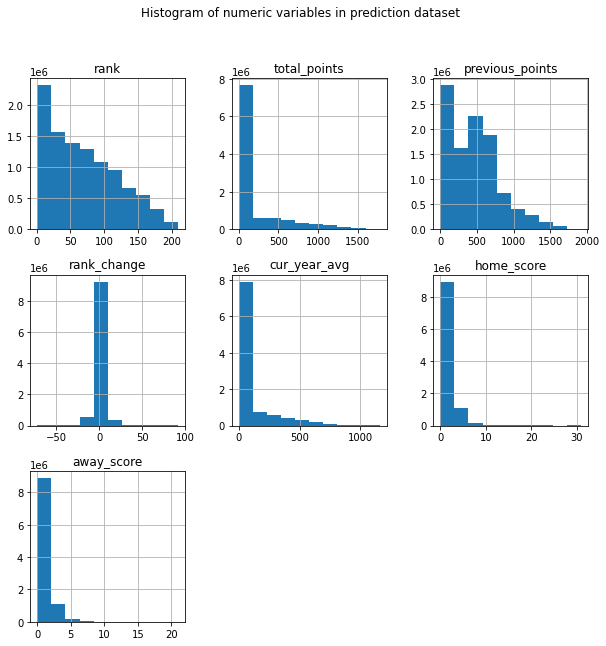

In [51]:
# Plotting our numerical variables on histogram to assess the relationship
prediction_df.drop(['country', 'confederation', 'date', 'home_team', 'away_team','tournament', 'city'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables in prediction dataset")
plt.savefig('Prediction access Histogram')
plt.show()

The rank, previous points,current year average, home score and away score data is positively skewed.

In [52]:
# Frequency Table of the Number of home teams
prediction_df.home_score.value_counts()

1.0     3053307
0.0     2471156
2.0     2251960
3.0     1198986
4.0      612838
5.0      293689
6.0      162534
7.0       86110
8.0       48395
9.0       27254
10.0      14070
11.0       8668
12.0       6512
13.0       3399
14.0       2803
15.0       1716
17.0        572
16.0        539
21.0        286
22.0        286
31.0        286
20.0        286
24.0        286
18.0        286
19.0        286
Name: home_score, dtype: int64

In [53]:
# Frequency Table of the Number of home teams
prediction_df.away_score.value_counts()

0.0     3808330
1.0     3315000
2.0     1772809
3.0      769456
4.0      317158
5.0      128415
6.0       64978
7.0       31001
8.0       16892
9.0        8694
10.0       4510
13.0       1969
11.0       1620
18.0       1397
15.0       1078
12.0       1019
17.0        620
20.0        453
16.0        286
19.0        286
21.0        286
14.0        253
Name: away_score, dtype: int64

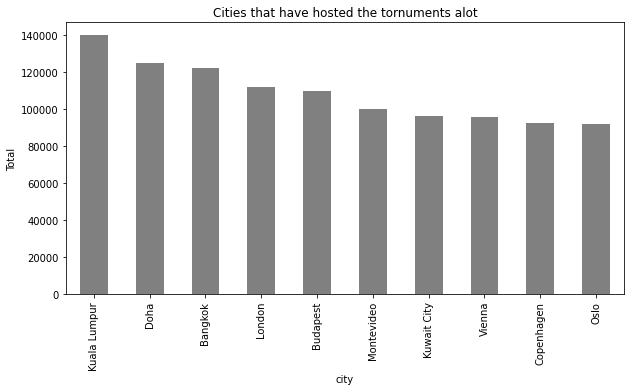

In [54]:
#Bar graph of countries that have the most points
plt.figure(figsize = (10,5))
prediction_df.groupby('city').size().sort_values(ascending = False)[:10].plot(kind='bar', color='grey')
plt.title('Cities that have hosted the tornuments alot')
plt.ylabel('Total')
plt.xlabel('city')
plt.show()

Kualar Lumpar has hosted many footbal tornaments than any other city

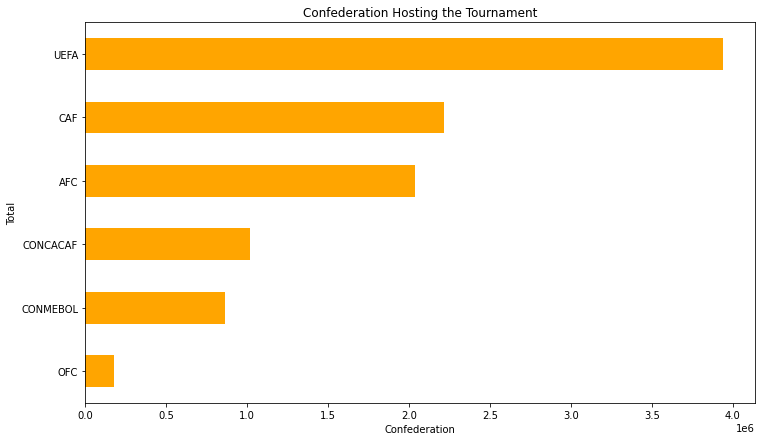

In [55]:
# Bar chart showing the different types of tournaments the countries participate in.
plt.figure(figsize = (12,7))
prediction_df.groupby('confederation').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('Confederation Hosting the Tournament')
plt.ylabel('Total')
plt.xlabel('Confederation')
plt.show()

UEFA is the most popular football body hosting many tournaments

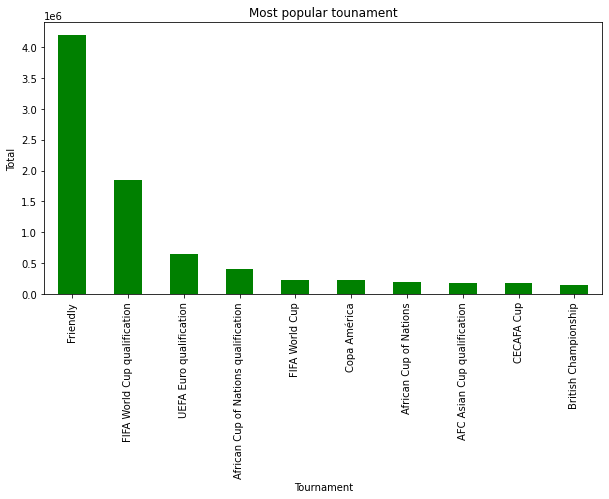

In [56]:
#Bar graph of the most popular tounament
plt.figure(figsize = (10,5))
prediction_df.groupby('tournament').size().sort_values(ascending = False)[:10].plot(kind='bar', color='green')
plt.title('Most popular tounament')
plt.ylabel('Total')
plt.xlabel('Tournament')
plt.show()

Country friendlies happen to be the most preferred international football tournament.Their is a huge gap to be explored as seen by the huge difference between friendly matches and other tournaments

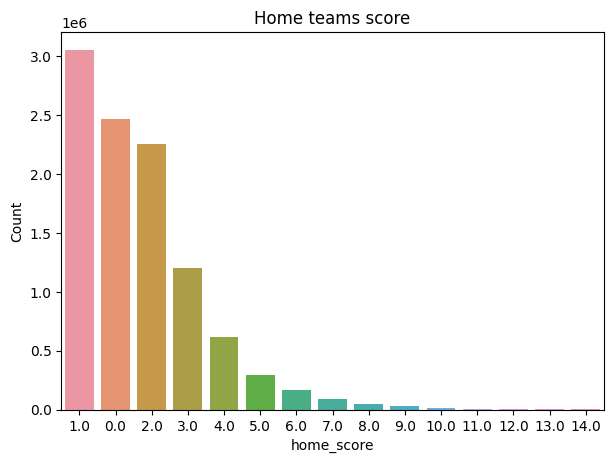

In [57]:
#Countplot showing the outcome of the goals scored by home teams
plt.figure(figsize = (7, 5), dpi=100)
sns.countplot(prediction_df['home_score'], order=prediction_df['home_score'].value_counts().index[:15])
plt.title('Home teams score')
plt.ylabel('Count')
plt.show()

Most of the home team scores ended with a one goal outcome

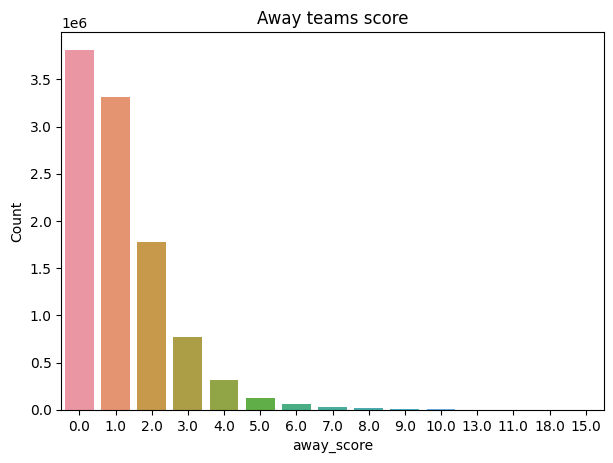

In [58]:
#Countplot showing the outcome of the goals scored by home teams
plt.figure(figsize = (7, 5), dpi=100)
sns.countplot(prediction_df['away_score'], order=prediction_df['away_score'].value_counts().index[:15])
plt.title('Away teams score')
plt.ylabel('Count')
plt.show()

Most of the away teams had a draw of (0) goals as an outcome

In [10]:
# We will define the numerical columns as colls to help with analysis
colls = ['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg','home_score', 'away_score']
# Finding the mean of numerical columns
prediction_df[colls].mean()

rank                69.187186
total_points       172.345895
previous_points    459.498791
rank_change         -0.024820
cur_year_avg        86.979300
home_score           1.734292
away_score           1.179052
dtype: float64

In [13]:
# Finding the median of numerical columns
prediction_df[colls].median()

rank                61.0
total_points         0.0
previous_points    443.0
rank_change          0.0
cur_year_avg         0.0
home_score           1.0
away_score           1.0
dtype: float64

In [61]:
# Finding the median of numerical columns
prediction_df[colls].median()

rank                61.0
total_points         0.0
previous_points    443.0
rank_change          0.0
cur_year_avg         0.0
home_score           1.0
away_score           1.0
dtype: float64

In [62]:
# Standard Deviation of numerical columns
prediction_df[colls].std()

rank                50.863755
total_points       336.303945
previous_points    353.530667
rank_change          5.382218
cur_year_avg       176.544777
home_score           1.733112
away_score           1.381282
dtype: float64

In [63]:
# Variance of numerical columns
prediction_df[colls].var()

rank                 2587.121571
total_points       113100.343129
previous_points    124983.932285
rank_change            28.968270
cur_year_avg        31168.058143
home_score              3.003676
away_score              1.907940
dtype: float64

In [64]:
# Skewness of numerical columns
prediction_df[colls].skew()

rank               0.552165
total_points       2.087669
previous_points    0.781467
rank_change        0.893956
cur_year_avg       2.293096
home_score         2.099695
away_score         2.444753
dtype: float64

The data is positively skewed

In [65]:
# The Kurtosis of numerical columns
prediction_df[colls].kurt()

rank               -0.645885
total_points        3.664132
previous_points     0.484251
rank_change        17.542756
cur_year_avg        5.001318
home_score         10.176146
away_score         14.135410
dtype: float64

The home and away score has extreme values

**Recommendations**

1. Their is a sizable difference between friendly matches and other football organizaed tournaments. The football federations should take it as an opportunity and explore the gap.
2. Most of the cities hosting football matches are in Asia, it is therefore advisable that the FIFA governing body assess why their federations lank low in organizing matches.
3. The home teams were in a better position to score and win the game

4.2 **Bivarite Analysis**

In [ ]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg','home_score', 'away_score']
sns.pairplot(prediction_df[y])

The graphs represents different relationships between various variables. Most of the data ploted against home and away score was positively skewed.

In [ ]:
#A correlation matrix of the numerical values above for statistical clarity
corr = prediction_df[colls].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

Their is a notable negative correlation between some variables such as: rank and previous points, home score and rank, rank and previous point and rank. The highest positive correlation is 0.98 between current year average and total points.

4.3 **Multivariate Analyises**

Since it is under supervised learning, we use the reduction technique

In [11]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
#Creating a column that sums the number of total scored
prediction_df['total_scores'] = prediction_df['home_score'] + prediction_df['away_score']
prediction_df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'confederation', 'date', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'city', 'total_scores'],
      dtype='object')

In [13]:
#These are the columns that we will use for the analysis
dfc = ['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'confederation', 'date', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'city','total_scores']

We define the columns we will subject under LDA reduction technique

In [14]:
#Encoding the multiple columns at ago
prediction_dff = prediction_df[dfc].apply(LabelEncoder().fit_transform)
prediction_dff.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city,total_scores
0,0,75,0,57,53,0,5,222,103,253,1,0,53,715,1
1,0,75,0,57,53,0,5,245,103,27,0,3,53,453,3
2,0,75,0,57,53,0,5,253,103,180,1,2,53,753,3
3,0,75,0,57,53,0,5,266,103,253,6,2,53,1448,8
4,0,75,0,57,53,0,5,278,103,18,1,2,53,446,3


In [16]:
#Step 1: Seperating my target label (diagnosis) from other features
X = prediction_dff.drop(['total_scores'], axis = 1)
Y = prediction_dff['total_scores']

In [17]:
#Step 2: Confirming the features don't contain the target variable
X[1:14]

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city
1,0,75,0,57,53,0,5,245,103,27,0,3,53,453
2,0,75,0,57,53,0,5,253,103,180,1,2,53,753
3,0,75,0,57,53,0,5,266,103,253,6,2,53,1448
4,0,75,0,57,53,0,5,278,103,18,1,2,53,446
5,0,75,0,57,53,0,5,280,103,252,1,3,53,595
6,0,75,0,57,53,0,5,282,103,121,1,4,53,1012
7,0,75,0,57,53,0,5,310,103,180,2,3,53,831
8,0,75,0,57,53,0,5,326,103,253,1,2,53,513
9,0,75,0,57,53,0,5,336,103,74,1,4,53,595
10,0,75,0,57,53,0,5,499,103,121,1,0,53,198


In [18]:
#Checking the unique values of the target variable
Y.unique()

array([ 1,  3,  8,  4,  5,  6,  0,  7,  2,  9, 12, 13, 10, 11, 14, 20, 19,
       16, 15, 22, 17, 25, 24, 18, 23, 21])

In [19]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 1.07437366e-01,  3.03932846e-02,  1.66321814e-03,
         1.47301653e-02,  1.95389073e+00, -3.14241070e-03,
         1.05279566e+00,  6.34722486e-04,  7.42570901e-03,
         2.40940584e-02,  1.50741564e-01, -1.50741564e-01,
         7.58602644e-02,  3.10770852e-03],
       [ 1.07808675e-01,  3.06564818e-02,  1.65646983e-03,
         1.47289008e-02,  1.95384050e+00, -3.13092166e-03,
         1.07963603e+00,  6.19682943e-04,  7.32722601e-03,
         2.44320493e-02,  1.17916709e+03,  1.17878387e+03,
         7.64277322e-02,  3.05227665e-03],
       [ 1.08437093e-01,  3.06702424e-02,  1.65064008e-03,
         1.47200992e-02,  1.95400568e+00, -3.12198663e-03,
         1.11487443e+00,  6.06423037e-04,  7.23249867e-03,
         2.41412218e-02,  2.35816708e+03,  2.35773484e+03,
         7.78391188e-02,  3.08349444e-03],
       [ 1.09179092e-01,  3.05063113e-02,  1.63950974e-03,
         1.47309958e-02,  1.95428769e+00, -3.10461437e-03,
         1.12411589e+00,  5.87714654e-04,  7.

In [20]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
rank_change,1.953891
confederation,1.052796
home_score,0.150742
rank,0.107437
tournament,0.075860
country,0.030393
away_team,0.024094
previous_points,0.014730
home_team,0.007426
city,0.003108


The factors that influece the outcome of a match between two  teams are: rank change annd confederation hosting the match. The rest of the factors that are weakly determinants are: home score, rank, tournament, country, away team, previous points, home team, city, total points and data. 

**Recommendations**
1. A neutral ground would be likely to influence the negative correlation between home teams and away teams.
2.The rank change meant that the quality of ateam had improved and therefore their chances to win the match were high

5.1 **Polynomial Regression**

Some steps will be followed when conducting Polynomial Regression analyis include:Feature engineering, checking multicolineality using Linear regression tools, cross validating the models and computing the RMSE.

In [18]:
#importing the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In the first model we will use the home team column as the dependent variable for the frist model

in the second model we will use the away team score as the dependent variable.


The models will be used to predict the performance of a team given the ranks of the home and away teams

In [24]:
prediction_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,home_score,away_score,total_scores
count,1.025128e+07,1.025128e+07,1.025128e+07,1.025128e+07,1.025128e+07,1.024651e+07,1.024651e+07,1.024651e+07
mean,6.918719e+01,1.723459e+02,4.594988e+02,-2.482011e-02,8.697930e+01,1.734292e+00,1.179052e+00,2.913344e+00
std,5.086375e+01,3.363039e+02,3.535307e+02,5.382218e+00,1.765448e+02,1.733112e+00,1.381282e+00,2.070484e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,0.000000e+00,1.400000e+02,-2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,6.100000e+01,0.000000e+00,4.430000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
75%,1.050000e+02,1.964000e+02,6.590000e+02,1.000000e+00,8.368000e+01,2.000000e+00,2.000000e+00,4.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,1.158660e+03,3.100000e+01,2.100000e+01,3.100000e+01


5.2 **Multicolinearlity**

In [33]:
#dropping the colomns from the dataset to remain with only independent variables: rank of home team, 

independent_only = prediction_dff.drop(columns=['total_points', 'previous_points','date','cur_year_avg'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,rank,country,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,total_scores
rank,1.000000,0.025200,-0.057762,-0.472561,0.026064,0.049119,-0.079716,0.093577,-0.117551,-0.015943,-0.008122
country,0.025200,1.000000,-0.001580,-0.084045,0.769043,-0.012885,-0.006419,-0.005495,-0.045277,-0.063264,-0.009798
rank_change,-0.057762,-0.001580,1.000000,0.006016,-0.001474,-0.001504,0.000164,-0.000552,0.001326,0.003439,-0.000263
confederation,-0.472561,-0.084045,0.006016,1.000000,-0.058833,-0.068204,0.025059,0.050553,0.330027,0.090889,0.058969
home_team,0.026064,0.769043,-0.001474,-0.058833,1.000000,-0.005133,0.010758,-0.007365,-0.033715,-0.047547,-0.004727
away_team,0.049119,-0.012885,-0.001504,-0.068204,-0.005133,1.000000,-0.006078,0.031359,-0.022597,-0.027875,0.007915
home_score,-0.079716,-0.006419,0.000164,0.025059,0.010758,-0.006078,1.000000,-0.033061,0.014291,0.014099,0.763810
away_score,0.093577,-0.005495,-0.000552,0.050553,-0.007365,0.031359,-0.033061,1.000000,0.038219,0.018884,0.587206
tournament,-0.117551,-0.045277,0.001326,0.330027,-0.033715,-0.022597,0.014291,0.038219,1.000000,0.066547,0.026623
city,-0.015943,-0.063264,0.003439,0.090889,-0.047547,-0.027875,0.014099,0.018884,0.066547,1.000000,0.015790


The correlations will be used to compute the variation inflation factors (VIF) scores.

In [37]:
#creating an inverse matrix
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,rank,country,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,total_scores
rank,1.328071,0.044317,0.072851,0.654129,-0.036130,-0.017379,0.133699,-0.114175,-0.053195,-0.033163,-0.060504
country,0.044317,2.467737,0.002802,0.112902,-1.892463,0.027839,0.285635,0.184039,0.010263,0.054195,-0.318653
rank_change,0.072851,0.002802,1.004045,0.029915,-0.001218,0.000082,0.005400,-0.006957,-0.002031,-0.004685,-0.000799
confederation,0.654129,0.112902,0.029915,1.466942,-0.038812,0.059458,0.283686,0.086871,-0.394549,-0.090120,-0.336498
home_team,-0.036130,-1.892463,-0.001218,-0.038812,2.458921,-0.009956,-0.400360,-0.269886,0.009185,0.002748,0.459144
away_team,-0.017379,0.027839,0.000082,0.059458,-0.009956,1.008030,-0.116289,-0.125954,0.002821,0.025153,0.150911
home_score,0.133699,0.285635,0.005400,0.283686,-0.400360,-0.116289,16.149552,11.855676,-0.240592,-0.158673,-19.301821
away_score,-0.114175,0.184039,-0.006957,0.086871,-0.269886,-0.125954,11.855676,10.267229,-0.197752,-0.124136,-15.081767
tournament,-0.053195,0.010263,-0.002031,-0.394549,0.009185,0.002821,-0.240592,-0.197752,1.130419,-0.036548,0.293326
city,-0.033163,0.054195,-0.004685,-0.090120,0.002748,0.025153,-0.158673,-0.124136,-0.036548,1.016040,0.184408


The VIF values of each diagonal are: rank(1.32), rank_change(1.00), home_score(16.14), away_score(10.14) and total scores (24.6055). Removing the total scores, we will test and record the changes

In [34]:
revised = independent_only.drop(columns=['total_scores'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,rank,country,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city
rank,1.327922,0.043533,0.072849,0.653301,-0.035001,-0.017008,0.086237,-0.151260,-0.052474,-0.032710
country,0.043533,2.463610,0.002792,0.108544,-1.886517,0.029793,0.035668,-0.011277,0.014062,0.056583
rank_change,0.072849,0.002792,1.004045,0.029905,-0.001203,0.000087,0.004773,-0.007447,-0.002021,-0.004679
confederation,0.653301,0.108544,0.029905,1.462340,-0.032533,0.061522,0.019720,-0.119383,-0.390538,-0.087598
home_team,-0.035001,-1.886517,-0.001203,-0.032533,2.450354,-0.012772,-0.040184,0.011543,0.003712,-0.000693
away_team,-0.017008,0.029793,0.000087,0.061522,-0.012772,1.007104,0.002093,-0.033454,0.001022,0.024022
home_score,0.086237,0.035668,0.004773,0.019720,-0.040184,0.002093,1.008220,0.024769,-0.010492,-0.014014
away_score,-0.151260,-0.011277,-0.007447,-0.119383,0.011543,-0.033454,0.024769,1.022973,-0.017960,-0.011104
tournament,-0.052474,0.014062,-0.002021,-0.390538,0.003712,0.001022,-0.010492,-0.017960,1.126922,-0.038746
city,-0.032710,0.056583,-0.004679,-0.087598,-0.000693,0.024022,-0.014014,-0.011104,-0.038746,1.014658


This indicates that total scores and rank are collinear. 

5.3 Model buidling using polynomial regression tools

In [35]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [16]:
prediction_dff.head(3)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city,total_scores
0,0,75,0,57,53,0,5,222,103,253,1,0,53,715,1
1,0,75,0,57,53,0,5,245,103,27,0,3,53,453,3
2,0,75,0,57,53,0,5,253,103,180,1,2,53,753,3


In [37]:
prediction_df.shape

(10251284, 15)

In [18]:
#alligning the columns 


prediction_df.columns = prediction_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
prediction_df.head(5)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,total_scores
0,1,Germany,0.0,57,0,0.0,UEFA,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,False,1.0
1,1,Germany,0.0,57,0,0.0,UEFA,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,False,3.0
2,1,Germany,0.0,57,0,0.0,UEFA,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,False,3.0
3,1,Germany,0.0,57,0,0.0,UEFA,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart,False,8.0
4,1,Germany,0.0,57,0,0.0,UEFA,1911-10-09,Germany,Austria,1.0,2.0,Friendly,Dresden,False,3.0


Creating training datasets from the home team, away team and rank datassets

In [22]:
# Sum of various numerical columns
prediction_dff['home_team'].sum()

1506202612

In [23]:
# Sum of various numerical columns
prediction_dff['away_team'].sum()

1578981126

Training the home team data

In [24]:
#Split the dataset into train and test sets.


train = prediction_df[:1506202612] 

# Drop all the indexes of the train data we created above from the main data set then store the remaining data in a variable called test
test = prediction_df.drop(train.index)

# Confirm that the train and test dataset have out desired length
print("train:" + str(len(train)))
print("test:"+ str(len(test)))


train:10251284
test:0


In [25]:
# Check the apportionment of the home team
train_count=train['home_team'].value_counts()

# Check the apportionment of home team column
test_count=test['home_team'].value_counts()

# Print out the apportionment of home team column
print(train_count)
print('*************************')
print(test_count)

Brazil           153582
Argentina        151866
Germany          141570
England          139282
Sweden           136994
                  ...  
Felvidék            286
Romani people       286
Madrid              286
Chameria            277
North Vietnam       262
Name: home_team, Length: 302, dtype: int64
*************************
Series([], Name: home_team, dtype: int64)


As seen above the data has yet to achive an equal proportiationate that can be used train the data

In [26]:
#We apply stratified sampling due to the size of the data
# Stratified train sample
train_strat_datset = prediction_df.groupby('home_team', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.7))

# preview the stratified train dataset
train_strat_datset

# Stratified test sample
test_strat_dataset = prediction_df.drop(train_strat_datset.index)

# Preview the stratified test dataset
test_strat_dataset

# Print out the proprortion of private vs public schools in both train and test dataset
test_strat_count=test_strat_dataset['home_team'].value_counts()
train_strat_count=train_strat_datset['home_team'].value_counts()

print(train_strat_count)
print('*************************************************')
print(test_strat_count)

Brazil                   107507
Argentina                106306
Germany                   99099
England                   97497
Sweden                    95896
                          ...  
Palau                       200
St. Pierre & Miquelon       200
Romani people               200
Chameria                    194
North Vietnam               183
Name: home_team, Length: 302, dtype: int64
*************************************************
Brazil           46075
Argentina        45560
Germany          42471
England          41785
Sweden           41098
                 ...  
Curacao             86
Saint Helena        86
Palau               86
Chameria            83
North Vietnam       79
Name: home_team, Length: 302, dtype: int64


Away team training Tests 

In [27]:
#Split the dataset into train and test sets.


train = prediction_df[:15578981126] 

# Drop all the indexes of the train data we created above from the main data set then store the remaining data in a variable called test
test = prediction_df.drop(train.index)

# Confirm that the train and test dataset have out desired length
print("train:" + str(len(train)))
print("test:"+ str(len(test)))

train:10251284
test:0


In [28]:
# Check the apportionment of the away score
train_count=train['away_team'].value_counts()

# Check the apportionment of away score column
test_count=test['away_team'].value_counts()

# Print out the apportionment of away score column
print(train_count)
print('*************************')
print(test_count)

Uruguay          144383
Sweden           140035
England          134799
Paraguay         118976
Hungary          118144
                  ...  
Corsica             286
Manchukuo           286
Central Spain       286
Asturias            286
Andalusia           286
Name: away_team, Length: 302, dtype: int64
*************************
Series([], Name: away_team, dtype: int64)


In [29]:
#We apply stratified sampling due to the size of the data
# Stratified train sample
train_strat_datset = prediction_df.groupby('away_team', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.7))

# preview the stratified train dataset
train_strat_datset

# Stratified test sample
test_strat_dataset = prediction_df.drop(train_strat_datset.index)

# Preview the stratified test dataset
test_strat_dataset

# Print out the proprortion of away team column
test_strat_count=test_strat_dataset['away_team'].value_counts()
train_strat_count=train_strat_datset['away_team'].value_counts()

print(train_strat_count)
print('*************************************************')
print(test_strat_count)

Uruguay               101068
Sweden                 98024
England                94359
Paraguay               83283
Hungary                82701
                       ...  
Parishes of Jersey       200
Asturias                 200
Yorkshire                200
Andalusia                200
Corsica                  200
Name: away_team, Length: 302, dtype: int64
*************************************************
Uruguay               43315
Sweden                42011
England               40440
Paraguay              35693
Hungary               35443
                      ...  
Yorkshire                86
Surrey                   86
Asturias                 86
Barawa                   86
Parishes of Jersey       86
Name: away_team, Length: 302, dtype: int64


Rank training tests

In [19]:
# Sum of various numerical columns
prediction_df['rank'].sum()

709257489

In [20]:
#Split the dataset into train and test sets.


train = prediction_df[:709257489] 

# Drop all the indexes of the train data we created above from the main data set then store the remaining data in a variable called test
test = prediction_df.drop(train.index)

# Confirm that the train and test dataset have out desired length
print("train:" + str(len(train)))
print("test:"+ str(len(test)))

train:10251284
test:0


In [21]:
# Check the apportionment of the home score
train_count=train['rank'].value_counts()

# Check the apportionment of home score column
test_count=test['rank'].value_counts()

# Print out the apportionment of home score column
print(train_count)
print('*************************')
print(test_count)

2      154430
1      152340
3      134174
5      129008
7      127332
        ...  
205      3500
206      2746
207      2323
208       496
209       118
Name: rank, Length: 209, dtype: int64
*************************
Series([], Name: rank, dtype: int64)


In [30]:
#We apply stratified sampling due to the size of the data
# Stratified train sample
train_strat_datset = prediction_df.groupby('rank', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.7))

# preview the stratified train dataset
train_strat_datset

# Stratified test sample
test_strat_dataset = prediction_df.drop(train_strat_datset.index)

# Preview the stratified test dataset
test_strat_dataset

# Print out the proprortion of the rank column
test_strat_count=test_strat_dataset['rank'].value_counts()
train_strat_count=train_strat_datset['rank'].value_counts()

print(train_strat_count)
print('*************************************************')
print(test_strat_count)

2      108101
1      106638
3       93922
5       90306
7       89132
        ...  
205      2450
206      1922
207      1626
208       347
209        83
Name: rank, Length: 209, dtype: int64
*************************************************
2      46329
1      45702
3      40252
5      38702
7      38200
       ...  
205     1050
206      824
207      697
208      149
209       35
Name: rank, Length: 209, dtype: int64


*Model 1*

In [31]:
prediction_dff.head(3)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city,total_scores
0,0,75,0,57,53,0,5,222,103,253,1,0,53,715,1
1,0,75,0,57,53,0,5,245,103,27,0,3,53,453,3
2,0,75,0,57,53,0,5,253,103,180,1,2,53,753,3


In [41]:
#Get the 10 and the rank column from the dataset 
X = tuple(prediction_df.iloc[:, 8:10].values)
y = tuple(prediction_df.iloc[:, 8].values)
print(X)
print(y)

Model 1 Home team scores

In [ ]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

6.1 **Logistic Regression**

From the Home Team's perspective, if the result of a game determines if it is a win, loss or draw.

We will use the test training results from Polynomial regression.

We then use grid search to optimize the outcomes

In [15]:
prediction_dff.head(3)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,confederation,date,home_team,away_team,home_score,away_score,tournament,city,total_scores
0,0,75,0,57,53,0,5,222,103,253,1,0,53,715,1
1,0,75,0,57,53,0,5,245,103,27,0,3,53,453,3
2,0,75,0,57,53,0,5,253,103,180,1,2,53,753,3


In [16]:
# Performing Data Preprocessing using the home score
# ---
# 
X = prediction_dff.iloc[:, 0:11].values
y = prediction_dff.iloc[:, 11].values

In [17]:
# Performing Data Preprocessing
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# Scaling our Data
# ---
# 
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [19]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
 #Training and validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
#printing the accuracies generated from the 5 folds
print(all_accuracies.mean())

In [ ]:
#Grid search
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]

In [ ]:
#Instantiating GridSearchCV object
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
#Calling in the fit method
gd_sr.fit(X_train, y_train)

In [ ]:
#Checking the parameters that return the highest accuracy
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
#finding the obtained accuracy
best_result = gd_sr.best_score_
print(best_result)

We now fit the Logistic parameters

In [ ]:
# Splitting our dataset
#
X = df.drop("species",axis=1)
y = df["species"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
